In [1]:
import os
import numpy as np

housing_path = "dataset/housing/"

In [2]:
import pandas as pd

def load_data(housing_path = housing_path):
    dataset_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(dataset_path)


housing = load_data()
housing.info()
housing.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


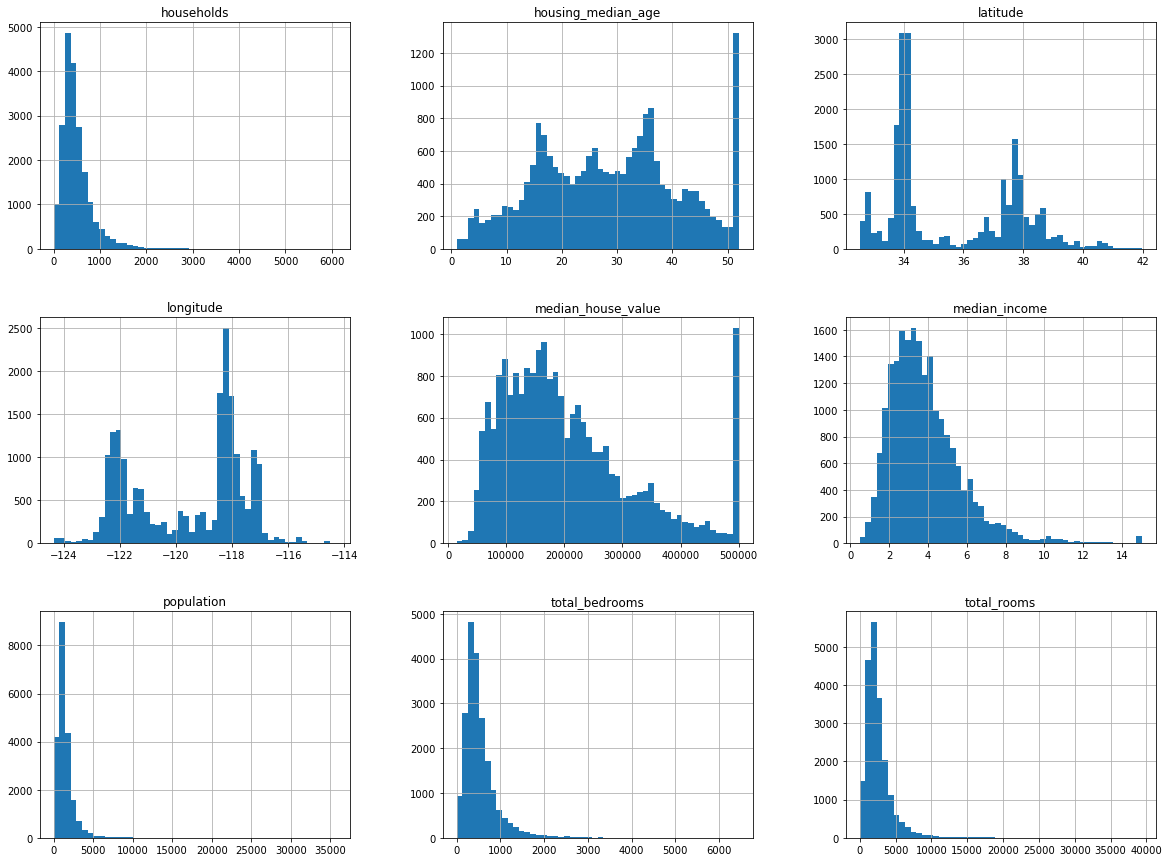

In [3]:
import matplotlib.pyplot as plt

housing.hist(bins = 50, figsize = (20, 15))
plt.show()

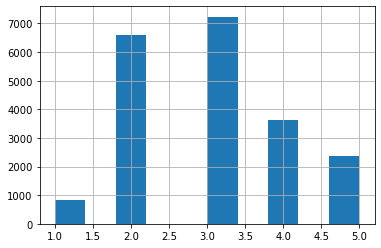

In [4]:
housing["income_cat"] = pd.cut(housing["median_income"], 
                              bins = [0., 1.5, 3.0, 4.5, 6, np.inf],
                              labels =[1, 2, 3, 4, 5])

housing["income_cat"].hist()

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index] 
    strat_test_set = housing.loc[test_index] 
    

housing = strat_train_set.copy()
strat_test_set["income_cat"].value_counts()/len(strat_test_set)


3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [6]:
for set_ in (strat_test_set, strat_train_set):
    set_.drop("income_cat", axis=1, inplace=True)

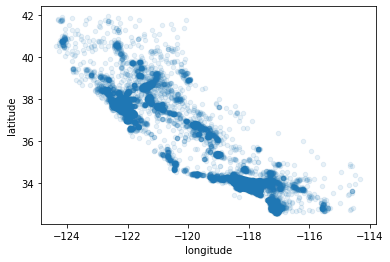

In [7]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

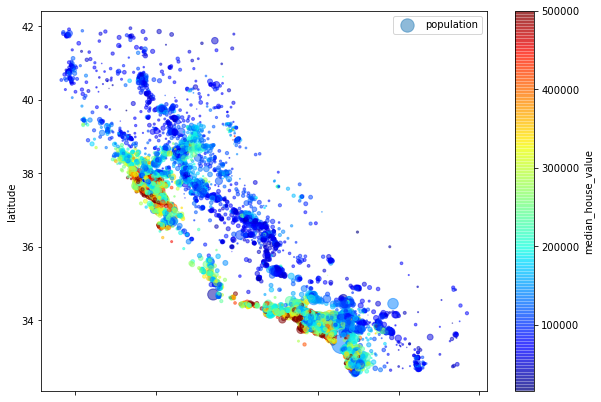

In [8]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5,
            s=housing["population"]/100, label="population", figsize=(10, 7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [9]:
corr_matrix = housing.corr()

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BC18E77668>,
      dtype=object)

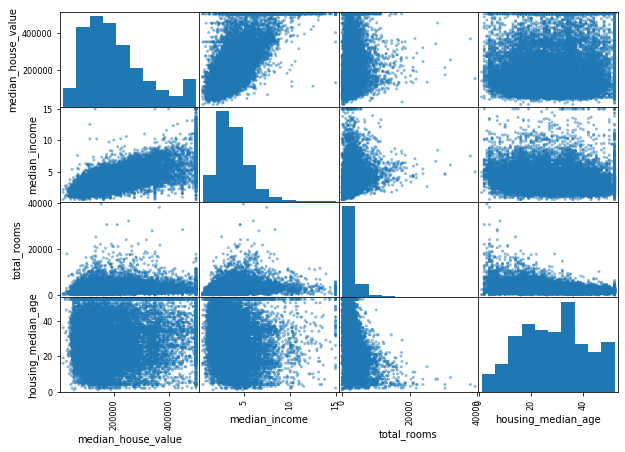

In [10]:
attributes = ["median_house_value", "median_income", "total_rooms",
             "housing_median_age"]

pd.plotting.scatter_matrix(housing[attributes], figsize=(10, 7))

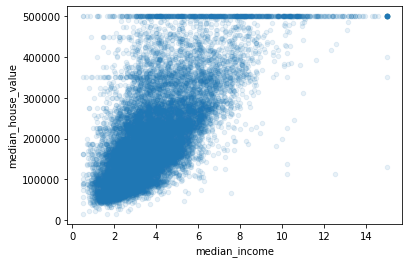

In [11]:
housing.plot(kind="scatter", y="median_house_value", x="median_income", alpha=0.1)

In [12]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [13]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")

housing_num = housing.drop("ocean_proximity", axis=1)
X = imputer.fit_transform(housing_num)

In [14]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns)
housing_tr.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,533.998123,1419.790819,497.060380,3.875589
std,2.001860,2.138058,12.574726,2138.458419,410.839621,1115.686241,375.720845,1.904950
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1443.000000,296.000000,784.000000,279.000000,2.566775
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900
75%,-118.010000,37.720000,37.000000,3141.000000,641.000000,1719.250000,602.000000,4.744475
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


In [15]:
housing_cat = housing[["ocean_proximity"]]

In [16]:
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder()
housing_cat_1hot = one_hot.fit_transform(housing_cat)

housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
             return np.c_[X, rooms_per_household, population_per_household]

In [18]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra = attr_adder.transform(housing.values)

housing_extra

array([[-121.89, 37.29, 38.0, ..., '<1H OCEAN', 4.625368731563422,
        2.094395280235988],
       [-121.93, 37.05, 14.0, ..., '<1H OCEAN', 6.008849557522124,
        2.7079646017699117],
       [-117.2, 32.77, 31.0, ..., 'NEAR OCEAN', 4.225108225108225,
        2.0259740259740258],
       ...,
       [-116.4, 34.09, 9.0, ..., 'INLAND', 6.34640522875817,
        2.742483660130719],
       [-118.01, 33.82, 31.0, ..., '<1H OCEAN', 5.50561797752809,
        3.808988764044944],
       [-122.45, 37.77, 52.0, ..., 'NEAR BAY', 4.843505477308295,
        1.9859154929577465]], dtype=object)

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('add_attr', CombinedAttributesAdder()),
    ('std_scale', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [20]:
from sklearn.compose import ColumnTransformer

num_attr = list(housing_num)
cat_attr = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attr),
    ("cat", OneHotEncoder(), cat_attr),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [21]:
'''
Liner Regression model
'''

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [22]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

lin_rmse

68628.19819848923

In [23]:
'''
Decision Tree Model
'''

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [24]:
'''
Mostly overfitting
'''

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)

tree_rmse

0.0

In [25]:
def score_display(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

In [26]:
'''
Scores of tree model
'''

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, 
                         scoring = "neg_mean_squared_error", cv=10)

tree_rmse = np.sqrt(-scores)
score_display(tree_rmse)

Scores:  [70172.16020415 65096.59975048 70037.54068486 70004.65920318
 71306.8007868  74785.29858114 71068.97375485 70217.72122131
 78484.87288103 70053.36963785]
Mean:  71122.79967056245
Standard Deviation:  3305.456814164809


In [27]:
'''
Scores of linear model
'''

scores = cross_val_score(lin_reg, housing_prepared, housing_labels, 
                         scoring = "neg_mean_squared_error", cv=10)

lin_rmse = np.sqrt(-scores)
score_display(lin_rmse)

Scores:  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean:  69052.46136345083
Standard Deviation:  2731.6740017983425


In [28]:
'''
Random Forest Model
'''

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [29]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)

forest_rmse

18669.601695386653

In [30]:
scores = cross_val_score(forest_reg, housing_prepared, housing_labels, 
                         scoring = "neg_mean_squared_error", cv=10)

forest_rmse = np.sqrt(-scores)
score_display(forest_rmse)

Scores:  [49205.23358451 47178.41695693 49762.77859427 52332.29204669
 49805.63821754 53509.97302076 48880.9070344  48349.08239198
 53234.34245456 50115.42164907]
Mean:  50237.40859507171
Standard Deviation:  2008.3598953855796


In [35]:
'''
Fine tuning the model
'''

from sklearn.model_selection import GridSearchCV

grid_param = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap':[False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, grid_param, cv=5,
                          scoring="neg_mean_squared_error",
                          return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [38]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [41]:
'''
cv results
'''

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64191.53636310741 {'max_features': 2, 'n_estimators': 3}
55028.69513520485 {'max_features': 2, 'n_estimators': 10}
52868.535790207374 {'max_features': 2, 'n_estimators': 30}
60498.625808418314 {'max_features': 4, 'n_estimators': 3}
52959.654581681345 {'max_features': 4, 'n_estimators': 10}
50384.63340183188 {'max_features': 4, 'n_estimators': 30}
58421.130366315185 {'max_features': 6, 'n_estimators': 3}
52231.88715213605 {'max_features': 6, 'n_estimators': 10}
50232.93809503889 {'max_features': 6, 'n_estimators': 30}
58398.49457932017 {'max_features': 8, 'n_estimators': 3}
52383.412979910645 {'max_features': 8, 'n_estimators': 10}
49931.212060626945 {'max_features': 8, 'n_estimators': 30}
61746.29936127141 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54367.0502700649 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60186.58356353739 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52624.02402178894 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [57]:
housing_prediction = grid_search.best_estimator_.predict(housing_prepared)
grid_search_mse = mean_squared_error(housing_prediction, housing_labels)
grid_search_rmse = np.sqrt(grid_search_mse)

grid_search_rmse

19115.603056222426

In [64]:
'''
Saving the model
'''

import joblib

joblib.dump(grid_search, "models/price_forest_grid.pkl")

['models/price_forest_grid.pkl']

In [65]:
'''
Loading the model
'''

load_model = joblib.load("models/price_forest_grid.pkl")

housing_prediction = load_model.best_estimator_.predict(housing_prepared)
load_model_mse = mean_squared_error(housing_prediction, housing_labels)
load_model_rmse = np.sqrt(load_model_mse)

load_model_rmse

19115.603056222426

In [61]:
'''
Running the final model on the test set
'''

final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_prediction = final_model.predict(X_test_prepared)

final_model_mse = mean_squared_error(final_prediction, y_test)
final_model_rmse = np.sqrt(final_model_mse)

final_model_rmse

47335.01242990998

In [63]:
from scipy import stats

confidence = 0.95
squared_error = (final_prediction - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_error)-1,
                        loc = squared_error.mean(),
                        scale = stats.sem(squared_error)))

array([45349.48857438, 49240.53908642])